### Prognozowanie liczby zamowien na podstawie konkursu Global Management Challenge

# Agenda

Table of contents

1. Abstract
2. About dataset
3. Import librariers
4. Prepare data
5. Exploratory data
6. Train Test Split
7. Functions
8. Custom Transformers
9. Pipeline
10. Models

# 1. Abstract

dafffffffffffffffffffffffffffffffffffffffff

# 2. About dataset

dddddddddddddddddd

# 3. Import libraries

ssssssssssssssssssssssssssssssssssssssss

In [1]:
# wyswietlanie bledow
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# pipeline construction
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# data processing
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder

# models trainng
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# optimization of hyperparameters
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, partial, space_eval
from sklearn.model_selection import cross_val_score

# model evaluation
import sklearn.metrics as metrics

# saving models
import pickle

# ustawienie ustawien
pd.set_option('display.max_columns', None)
pio.renderers.default='notebook'

# 4. Przygotowanie danych

## 4.1 All  Reports Data

In [2]:
%run -i 'scripts/01_prepare_all_reports_data/prepare_all_reports_data.py'

Number of reports:  257

Loading report  ././datasets/01_reports/17_01_RadwH25.xlsx
Loading report  ././datasets/01_reports/17_01_RadwH26.xlsx
Loading report  ././datasets/01_reports/17_01_RadwH27.xlsx
Loading report  ././datasets/01_reports/17_01_RadwH28.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH05.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH06.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH07.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH08.xlsx
Loading report  ././datasets/01_reports/17_02_RadwH09.xlsx
Loading report  ././datasets/01_reports/18_00_BananaH05.xlsx
Loading report  ././datasets/01_reports/18_00_BananaH06.xlsx
Loading report  ././datasets/01_reports/18_00_BananaH07.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH00.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH01.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH02.xlsx
Loading report  ././datasets/01_reports/18_00_HistoriaH03.xlsx
Loading r

Loading report  ././datasets/01_reports/20_01_DrugiRusekZ1H39.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H35.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H36.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H37.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H38.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ2H39.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H35.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H36.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H37.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H38.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ3H39.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H35.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H36.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H37.xlsx
Loading report  ././datasets/01_reports/20_01_DrugiRusekZ4H38.

## 4.2 All Reports Data -> current and previous

In [3]:
%run -i 'scripts/02_prepare_all_reports_current_previous/prepare_all_reports_current_previous.py'

Task done correctly


## 4.3 Demand Datasets

In [4]:
%run -i 'scripts/03_prepare_demand_datasets/prepare_demand_datasets.py'

('Prod1', 'Europe')
Dataset saved!
('Prod1', 'Nafta')
Dataset saved!
('Prod1', 'Internet')
Dataset saved!
('Prod2', 'Europe')
Dataset saved!
('Prod2', 'Nafta')
Dataset saved!
('Prod2', 'Internet')
Dataset saved!
('Prod3', 'Europe')
Dataset saved!
('Prod3', 'Nafta')
Dataset saved!
('Prod3', 'Internet')
Dataset saved!


## 4.4 Polaczenie danych

In [5]:
path = 'datasets/04_demand_datasets/'

### Product 1 Europe

In [6]:
Prod1_Europe = pd.read_csv(f'{path}Prod1_Europe.csv')
Prod1_Europe.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0     0.00         7.0            0   
1  Historia        0      1     5.0    15.00         7.0            2   
2  Historia        0      2     5.0    19.00         7.0            3   
3  Historia        0      3     5.0    21.40         7.0            3   
4  Historia        0      4     5.0    22.84         7.0            3   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         100.0   
1       3.0   73333.333333              0   1.55  285.0         115.0   
2       1.0   90000.000000              0   1.60  285.0         115.0   
3       0.0  103333.333333              0   1.65  300.0         115.0   
4       0.0  111666.666667              0   1.70  325.0         115.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0      285.0        594           0  
2             0.0             0.0      285.0       1210         594  
3             0.0             0.0      300.0       1319        1210  
4             0.0             0.0      325.0        967        1319

### Product 1 Nafta

In [7]:
Prod1_Nafta = pd.read_csv(f'{path}Prod1_Nafta.csv')
Prod1_Nafta.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0      0.0         0.0            0   
1  Historia        0      1     0.0      0.0         0.0            0   
2  Historia        0      2     0.0      0.0         6.0            0   
3  Historia        0      3     5.0      5.0         6.0            1   
4  Historia        0      4     5.0      8.0         6.0            1   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         100.0   
1       3.0   73333.333333              0   1.55    0.0         115.0   
2       1.0   90000.000000              0   1.60    0.0         115.0   
3       0.0  103333.333333              0   1.65  290.0         115.0   
4       0.0  111666.666667              0   1.70  335.0         115.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0      290.0        180           0  
4             0.0             0.0      335.0        157         180

### Product 1 Internet

In [8]:
Prod1_Internet = pd.read_csv(f'{path}Prod1_Internet.csv')
Prod1_Internet.head()

Team  History  Cycle  DirAdv  CorpAdv  Support  FailedVisits  Training  \
0  Historia        0      0     0.0      0.0      0.0         100.0       1.0   
1  Historia        0      1     0.0      0.0      0.0         100.0       3.0   
2  Historia        0      2     0.0      0.0      0.0         100.0       1.0   
3  Historia        0      3     0.0      0.0      9.0           0.1       0.0   
4  Historia        0      4     5.0     10.0      9.0           0.1       0.0   

     ManagBudget  WebDev  BacklogOrders  RandD  Price  AssemblyTime  \
0   26666.666667     0.0              0   1.75    0.0         100.0   
1   73333.333333     0.0              0   1.55    0.0         115.0   
2   90000.000000     0.0              0   1.60    0.0         115.0   
3  103333.333333    15.0              0   1.65    0.0         115.0   
4  111666.666667    15.0              0   1.70  375.0         115.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0        NaN          0           0  
4             0.0             0.0      375.0        238           0

### Product 2 Europe

In [9]:
Prod2_Europe = pd.read_csv(f'{path}Prod2_Europe.csv')
Prod2_Europe.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0     0.00         7.0            0   
1  Historia        0      1     5.0    15.00         7.0            2   
2  Historia        0      2     5.0    19.00         7.0            3   
3  Historia        0      3     5.0    21.40         7.0            3   
4  Historia        0      4     5.0    22.84         7.0            3   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.76    0.0         155.0   
1       3.0   73333.333333              0   1.53  450.0         165.0   
2       1.0   90000.000000              0   1.58  450.0         165.0   
3       0.0  103333.333333              0   1.63  450.0         165.0   
4       0.0  111666.666667              7   2.63  490.0         165.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0      450.0        368           0  
2             0.0             0.0      450.0        684         368  
3             0.0             0.0      450.0        805         684  
4             0.0             0.0      490.0        634         798

### Product 2 Nafta

In [10]:
Prod2_Nafta = pd.read_csv(f'{path}Prod2_Nafta.csv')
Prod2_Nafta.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0      0.0         0.0            0   
1  Historia        0      1     0.0      0.0         0.0            0   
2  Historia        0      2     0.0      0.0         6.0            0   
3  Historia        0      3     5.0      5.0         6.0            1   
4  Historia        0      4     5.0      8.0         6.0            1   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.76    0.0         155.0   
1       3.0   73333.333333              0   1.53    0.0         165.0   
2       1.0   90000.000000              0   1.58    0.0         165.0   
3       0.0  103333.333333              0   1.63  440.0         165.0   
4       0.0  111666.666667              0   2.63  490.0         165.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0      440.0        137           0  
4             0.0             0.0      490.0        141         137

### Product 2 Internet

In [11]:
Prod2_Internet = pd.read_csv(f'{path}Prod2_Internet.csv')
Prod2_Internet.head()

Team  History  Cycle  DirAdv  CorpAdv  Support  FailedVisits  Training  \
0  Historia        0      0     0.0      0.0      0.0         100.0       1.0   
1  Historia        0      1     0.0      0.0      0.0         100.0       3.0   
2  Historia        0      2     0.0      0.0      0.0         100.0       1.0   
3  Historia        0      3     0.0      0.0      9.0           0.1       0.0   
4  Historia        0      4     5.0     10.0      9.0           0.1       0.0   

     ManagBudget  WebDev  BacklogOrders  RandD  Price  AssemblyTime  \
0   26666.666667     0.0              0   1.76    0.0         155.0   
1   73333.333333     0.0              0   1.53    0.0         165.0   
2   90000.000000     0.0              0   1.58    0.0         165.0   
3  103333.333333    15.0              0   1.63    0.0         165.0   
4  111666.666667    15.0              0   2.63  590.0         165.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0        NaN          0           0  
4             0.0             0.0      590.0        162           0

### Product 3 Europe

In [12]:
Prod3_Europe = pd.read_csv(f'{path}Prod3_Europe.csv')
Prod3_Europe.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0     0.00         7.0            0   
1  Historia        0      1    10.0    15.00         7.0            2   
2  Historia        0      2    10.0    19.00         7.0            3   
3  Historia        0      3    10.0    21.40         7.0            3   
4  Historia        0      4    10.0    22.84         7.0            3   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         300.0   
1       3.0   73333.333333              0   1.53  680.0         325.0   
2       1.0   90000.000000              0   1.58  680.0         325.0   
3       0.0  103333.333333              0   1.63  690.0         325.0   
4       0.0  111666.666667              0   1.68  700.0         325.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0      680.0        224           0  
2             0.0             0.0      680.0        388         224  
3             0.0             0.0      690.0        449         388  
4             0.0             0.0      700.0        374         449

### Product 3 Nafta

In [13]:
Prod3_Nafta = pd.read_csv(f'{path}Prod3_Nafta.csv')
Prod3_Nafta.head()

Team  History  Cycle  DirAdv  CorpAdv  Commission  AgentsDistr  \
0  Historia        0      0     0.0      0.0         0.0            0   
1  Historia        0      1     0.0      0.0         0.0            0   
2  Historia        0      2     0.0      0.0         6.0            0   
3  Historia        0      3     5.0      5.0         6.0            1   
4  Historia        0      4     5.0      8.0         6.0            1   

   Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0       1.0   26666.666667              0   1.75    0.0         300.0   
1       3.0   73333.333333              0   1.53    0.0         325.0   
2       1.0   90000.000000              0   1.58    0.0         325.0   
3       0.0  103333.333333              0   1.63  680.0         325.0   
4       0.0  111666.666667              6   1.68  725.0         325.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0      680.0         73           0  
4             0.0             0.0      725.0         75          67

### Product 3 Internet

In [14]:
Prod3_Internet = pd.read_csv(f'{path}Prod3_Internet.csv')
Prod3_Internet.head()

Team  History  Cycle  DirAdv  CorpAdv  Support  FailedVisits  Training  \
0  Historia        0      0     0.0      0.0      0.0         100.0       1.0   
1  Historia        0      1     0.0      0.0      0.0         100.0       3.0   
2  Historia        0      2     0.0      0.0      0.0         100.0       1.0   
3  Historia        0      3     0.0      0.0      9.0           0.1       0.0   
4  Historia        0      4     5.0     10.0      9.0           0.1       0.0   

     ManagBudget  WebDev  BacklogOrders  RandD  Price  AssemblyTime  \
0   26666.666667     0.0              0   1.75    0.0         300.0   
1   73333.333333     0.0              0   1.53    0.0         325.0   
2   90000.000000     0.0              0   1.58    0.0         325.0   
3  103333.333333    15.0              0   1.63    0.0         325.0   
4  111666.666667    15.0              0   1.68  850.0         325.0   

   MarketShares_p  MarketShares_c  MeanPrice  NumOrders  NumSales_p  
0             0.0             0.0        NaN          0           0  
1             0.0             0.0        NaN          0           0  
2             0.0             0.0        NaN          0           0  
3             0.0             0.0        NaN          0           0  
4             0.0             0.0      850.0         92           0

BLA BLA BLA - laczymy pliki, dodajemy kolumny by byly takie same itp itd ;) 

In [15]:
list_of_files = [
    Prod1_Europe, Prod2_Europe, Prod3_Europe,
    Prod1_Nafta, Prod2_Nafta, Prod3_Nafta,
    Prod1_Internet, Prod2_Internet, Prod3_Internet
]

# Areas

# Europe
for file in list_of_files[:3]:
    file['Support'] = 0
    file['FailedVisits'] = 0
    file['WebDev'] = 0
    file['Area'] = 'Europe'

# Nafta
for file in list_of_files[3:6]:
    file['Support'] = 0
    file['FailedVisits'] = 0
    file['WebDev'] = 0
    file['Area'] = 'Nafta'

# Internet
for file in list_of_files[6:]:
    file['Commission'] = 0
    file['AgentsDistr'] = 0
    file['Area'] = 'Internet'

# Product 1
for file in list_of_files[0::3]:
    file['Product'] = 1

# Product 2
for file in list_of_files[1::3]:
    file['Product'] = 2
    
# Product 3
for file in list_of_files[2::3]:
    file['Product'] = 3
    
data = pd.concat(list_of_files)
data.drop(['Team', 'MarketShares_c'], axis=1, inplace=True)
data = data[data['Cycle'] >= 5].reset_index(drop=True)
data = data[data['NumOrders'] >= 10].reset_index(drop=True)
data['History'] = pd.Categorical(data['History'])
data['Cycle'] = pd.Categorical(data['Cycle'])
data['Area'] = pd.Categorical(data['Area'])
data['Product'] = pd.Categorical(data['Product'])

# ustawienie za pierwsza kolumne zmiennej objasnianej
col_name="NumOrders"
first_col = data.pop(col_name)
data.insert(0, col_name, first_col)

data

NumOrders History Cycle  DirAdv     CorpAdv  Commission  AgentsDistr  \
0          1386       0     5    30.0   23.704000         7.0            3   
1          1288       0     5     6.0   23.704000         8.0            3   
2           698       0     5    37.0   23.704000        11.0            3   
3          1150       0     5     5.0   23.704000         7.0            3   
4          1213       0     5    10.0   23.704000         8.0            3   
...         ...     ...   ...     ...         ...         ...          ...   
2123        378       3     9    20.0   54.424832         0.0            0   
2124        409       3     9    20.0   76.560832         0.0            0   
2125        468       3     9    20.0  130.176832         0.0            0   
2126        416       3     9    22.0   70.248832         0.0            0   
2127        487       3     9    29.0   83.368832         0.0            0   

      Training    ManagBudget  BacklogOrders  RandD  Price  AssemblyTime  \
0          2.0  136666.666667              0   2.68  340.0         109.0   
1          2.0  116666.666667              0   1.75  300.0         115.0   
2         22.0  211333.333333              0   2.68  428.0         109.0   
3          0.0  116666.666667              0   2.43  325.0         120.0   
4          5.0  120000.000000              0   2.45  345.0         130.0   
...        ...            ...            ...    ...    ...           ...   
2123       7.0  173333.333333              1   3.78  828.0         375.0   
2124      13.0  191666.666667              0   3.38  794.0         330.0   
2125      10.0  233333.333333             43   2.87  762.0         315.0   
2126       9.0  180333.333333              9   4.62  810.0         366.0   
2127      33.0  333333.333333              0   3.19  798.0         340.0   

      MarketShares_p   MeanPrice  NumSales_p  Support  FailedVisits  WebDev  \
0                0.0  337.800000         967      0.0           0.0     0.0   
1                0.0  308.625000         967      0.0           0.0     0.0   
2                0.0  364.125000         967      0.0           0.0     0.0   
3                0.0  326.375000         967      0.0           0.0     0.0   
4                0.0  331.000000         967      0.0           0.0     0.0   
...              ...         ...         ...      ...           ...     ...   
2123             0.0  759.571429         370     20.0           0.1    30.0   
2124            11.5  811.963255         345     30.0           0.1    30.0   
2125            12.1  770.492167         369     20.0           0.0    20.0   
2126             0.0  770.166667         350     20.0           0.0    15.0   
2127            10.9  823.985175         309     30.0           0.0    26.0   

          Area Product  
0       Europe       1  
1       Europe       1  
2       Europe       1  
3       Europe       1  
4       Europe       1  
...        ...     ...  
2123  Internet       3  
2124  Internet       3  
2125  Internet       3  
2126  Internet       3  
2127  Internet       3  

[2128 rows x 21 columns]

# 5. Exploratory

In [16]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NumOrders       2128 non-null   int64   
 1   History         2128 non-null   category
 2   Cycle           2128 non-null   category
 3   DirAdv          2128 non-null   float64 
 4   CorpAdv         2128 non-null   float64 
 5   Commission      2128 non-null   float64 
 6   AgentsDistr     2128 non-null   int64   
 7   Training        2128 non-null   float64 
 8   ManagBudget     2128 non-null   float64 
 9   BacklogOrders   2128 non-null   int64   
 10  RandD           2128 non-null   float64 
 11  Price           2128 non-null   float64 
 12  AssemblyTime    2128 non-null   float64 
 13  MarketShares_p  2128 non-null   float64 
 14  MeanPrice       2128 non-null   float64 
 15  NumSales_p      2128 non-null   int64   
 16  Support         2128 non-null   float64 
 17  FailedVisits  

In [17]:
data.describe() 

NumOrders       DirAdv      CorpAdv   Commission  AgentsDistr  \
count  2128.000000  2128.000000  2128.000000  2128.000000  2128.000000   
mean    728.321429    18.354793    54.563992     6.717105     3.081297   
std     561.362566    11.199292    32.385624     5.307458     2.662750   
min      21.000000     2.000000     9.800000     0.000000     0.000000   
25%     335.000000    10.000000    27.600000     0.000000     0.000000   
50%     527.000000    16.000000    52.636800     7.000000     3.000000   
75%     971.250000    24.000000    71.920000    12.000000     5.000000   
max    3277.000000    80.000000   166.933440    15.000000    12.000000   

          Training    ManagBudget  BacklogOrders        RandD        Price  \
count  2128.000000    2128.000000    2128.000000  2128.000000  2128.000000   
mean     19.435150  188350.250627      40.388158     3.026194   545.668233   
std      17.938502   61649.430459      89.080502     0.971163   196.852427   
min       0.000000  116666.666667       0.000000     0.980000   259.000000   
25%       3.000000  137333.333333       0.000000     2.310000   346.000000   
50%      15.000000  166666.666667       0.000000     2.800000   504.000000   
75%      33.000000  216666.666667      36.000000     3.830000   751.250000   
max      90.000000  353333.333333     818.000000     5.370000   999.000000   

       AssemblyTime  MarketShares_p    MeanPrice   NumSales_p      Support  \
count   2128.000000     2128.000000  2128.000000  2128.000000  2128.000000   
mean     210.224624        4.518092   540.464613   619.884398     5.818609   
std       93.807916        5.169052   192.438266   504.659543     8.895676   
min      100.000000        0.000000   210.243902     2.000000     0.000000   
25%      125.000000        0.000000   343.125000   238.000000     0.000000   
50%      175.000000        1.650000   501.853087   432.000000     0.000000   
75%      325.000000        9.400000   750.477679   870.250000    12.000000   
max      415.000000       23.200000   910.378947  3058.000000    42.000000   

       FailedVisits       WebDev  
count   2128.000000  2128.000000  
mean       0.160385     6.892387  
std        1.070788    10.440112  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        0.100000    15.000000  
max       21.100000    45.000000

In [18]:
data.groupby(["Product", "Area"]).mean()

NumOrders     DirAdv    CorpAdv  Commission  AgentsDistr  \
Product Area                                                                   
1       Europe    1618.177215  24.848101  57.517493   10.628692     5.206751   
        Internet  1268.957447  21.514894  63.536721    0.000000     0.000000   
        Nafta      774.738397  17.308017  42.661461    9.493671     4.025316   
2       Europe     858.203390  20.813559  57.421245   10.618644     5.199153   
        Internet   675.101695  18.525424  63.631443    0.000000     0.000000   
        Nafta      432.540084  15.291139  42.661461    9.493671     4.025316   
3       Europe     415.721519  17.767932  57.517493   10.628692     5.206751   
        Internet   315.762712  15.974576  63.631443    0.000000     0.000000   
        Nafta      198.835443  13.177215  42.661461    9.493671     4.025316   

                   Training    ManagBudget  BacklogOrders     RandD  \
Product Area                                                          
1       Europe    19.430380  188504.922644      79.746835  3.296793   
        Internet  19.412766  187974.468085      84.353191  3.289787   
        Nafta     19.430380  188504.922644      40.194093  3.296793   
2       Europe    19.334746  188314.971751      44.156780  3.161695   
        Internet  19.508475  188166.666667      44.233051  3.160975   
        Nafta     19.430380  188504.922644      24.105485  3.165654   
3       Europe    19.430380  188504.922644      18.675105  2.620802   
        Internet  19.508475  188166.666667      14.699153  2.624110   
        Nafta     19.430380  188504.922644      13.624473  2.620802   

                       Price  AssemblyTime  MarketShares_p   MeanPrice  \
Product Area                                                             
1       Europe    321.008439    120.219409        4.120253  317.459590   
        Internet  338.642553    120.191489        4.807234  336.803354   
        Nafta     324.556962    120.219409        3.535021  321.861124   
2       Europe    504.885593    172.402542        4.407627  499.351613   
        Internet  535.983051    172.360169        5.137288  535.748559   
        Nafta     505.569620    172.413502        3.898312  501.402703   
3       Europe    772.493671    337.894515        4.891139  760.202806   
        Internet  824.402542    337.885593        5.550000  816.513053   
        Nafta     782.687764    337.894515        4.324895  774.091447   

                   NumSales_p    Support  FailedVisits     WebDev  
Product Area                                                       
1       Europe    1440.324895   0.000000      0.000000   0.000000  
        Internet  1019.978723  17.506383      0.483830  20.753191  
        Nafta      645.210970   0.000000      0.000000   0.000000  
2       Europe     766.944915   0.000000      0.000000   0.000000  
        Internet   542.156780  17.516949      0.482203  20.741525  
        Nafta      354.784810   0.000000      0.000000   0.000000  
3       Europe     384.004219   0.000000      0.000000   0.000000  
        Internet   264.042373  17.516949      0.482203  20.741525  
        Nafta      163.679325   0.000000      0.000000   0.000000

BOXPLOTY

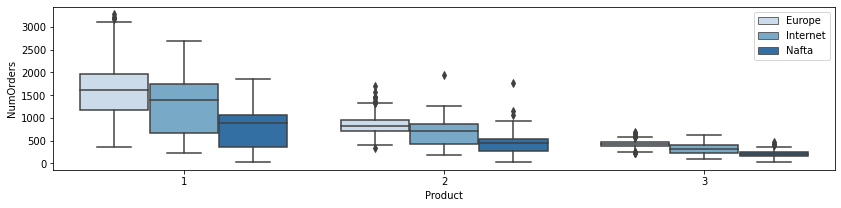

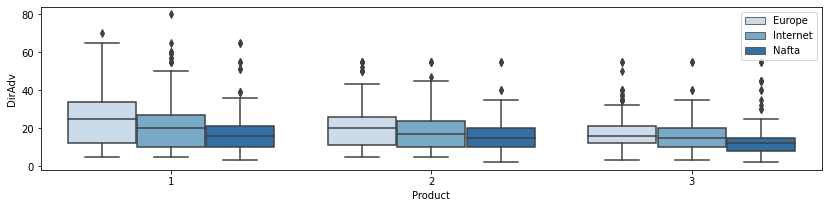

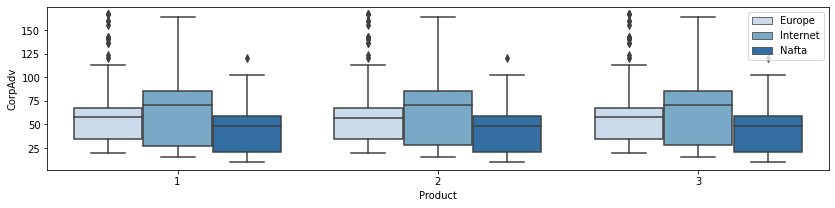

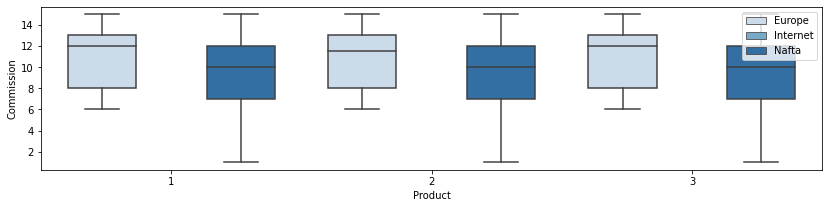

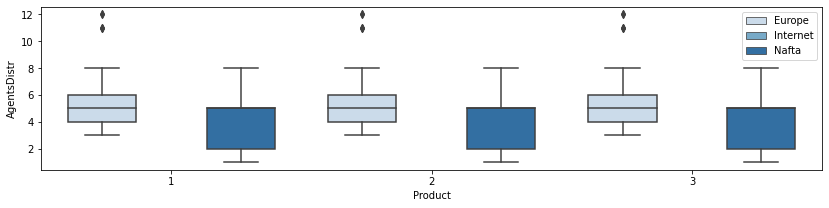

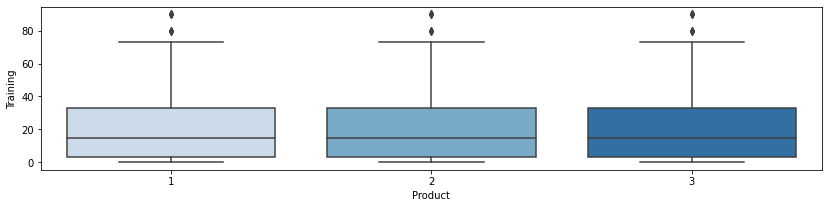

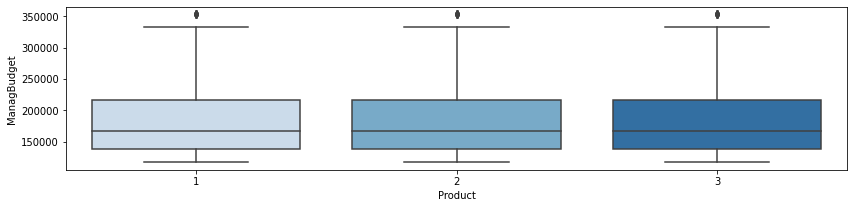

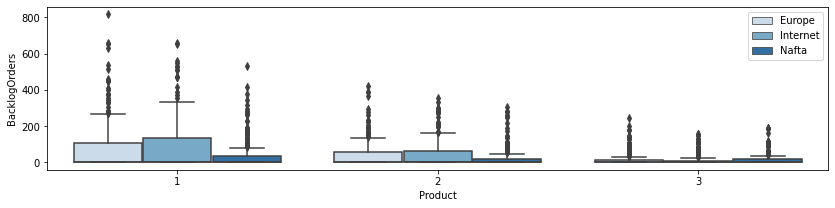

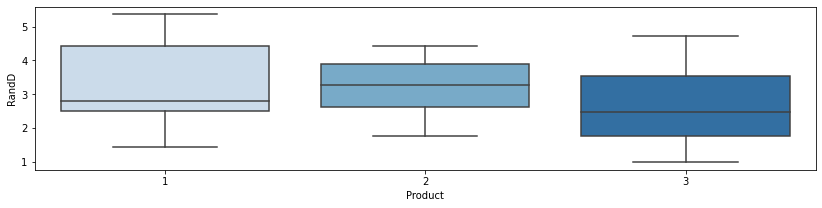

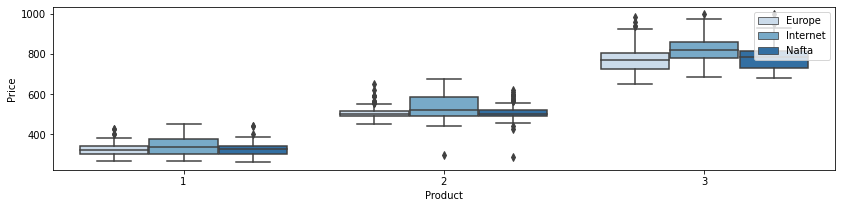

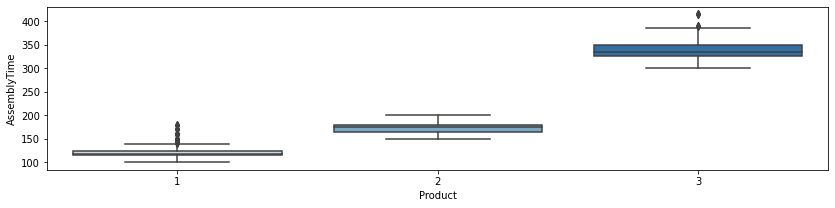

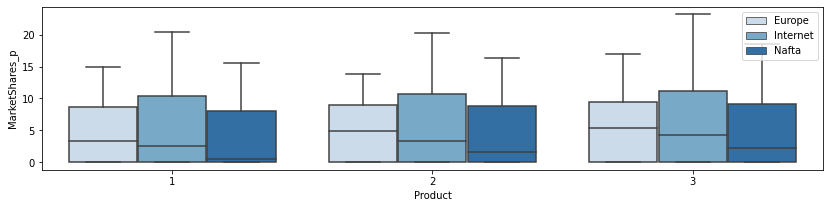

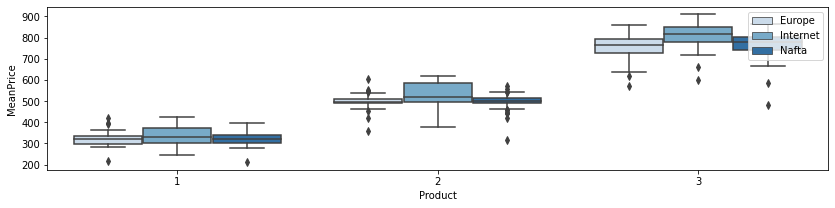

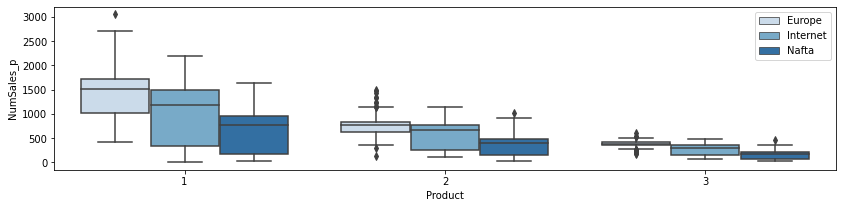

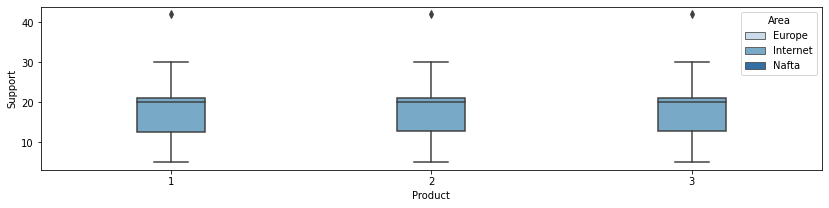

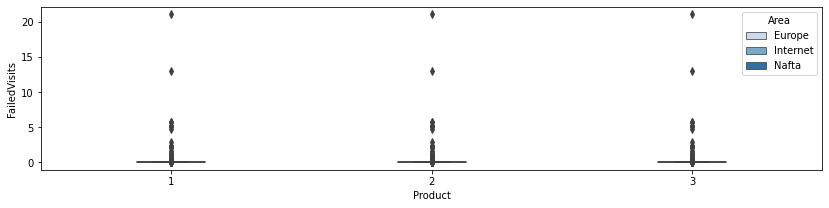

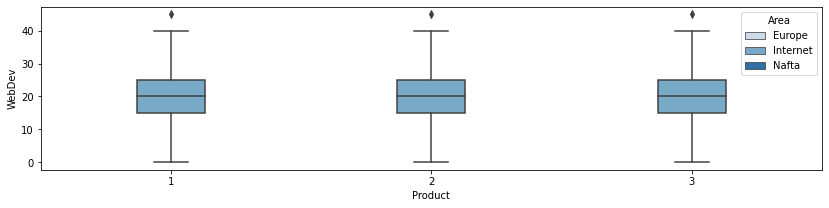

In [19]:
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(14, 3))
    data_selected = data.copy()
    hue_selected = "Area"
    if column == 'Commission':
        data_selected = data_selected[data_selected['Area'] != 'Internet']
    elif column == 'AgentsDistr':
        data_selected = data_selected[data_selected['Area'] != 'Internet']
    elif column == 'Training':
        hue_selected = None
    elif column == 'ManagBudget':
        hue_selected = None
    elif column == 'RandD':
        hue_selected = None
    elif column == 'AssemblyTime':
        hue_selected = None
    elif column == 'Support':
        data_selected = data_selected[data_selected['Area'] == 'Internet']
    elif column == 'FailedVisits':
        data_selected = data_selected[data_selected['Area'] == 'Internet']
    elif column == 'WebDev':
        data_selected = data_selected[data_selected['Area'] == 'Internet']
    sns.boxplot(x = "Product", y = column, hue = hue_selected, data = data_selected, palette = "Blues")
    plt.xlabel('Product')
    plt.ylabel(f'{column}')
    if column not in ['Training', 'ManagBudget', 'RandD', 'AssemblyTime', 'Support', 'FailedVisits', 'WebDev']:
        plt.legend(loc = 'upper right')
    plt.show()

bar plot for categorical columns

In [20]:
len(data.select_dtypes(include=['category']).columns)

4

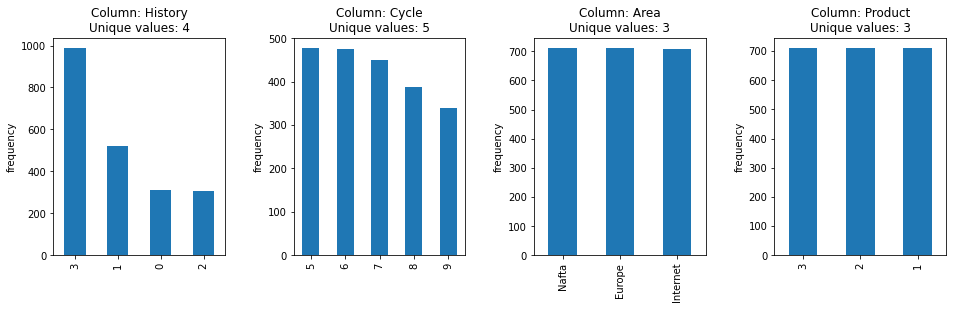

In [21]:
fig = plt.figure(figsize = (16, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for (column, i) in zip(data.select_dtypes(include=['category']).columns, range(1, 5)):
    ax = fig.add_subplot(1, 4, i)
    data[column].value_counts().plot.bar()
    plt.title(f'Column: {column}\nUnique values: {len(data[column].unique())}')
    plt.ylabel('frequency')
plt.show()

histograms

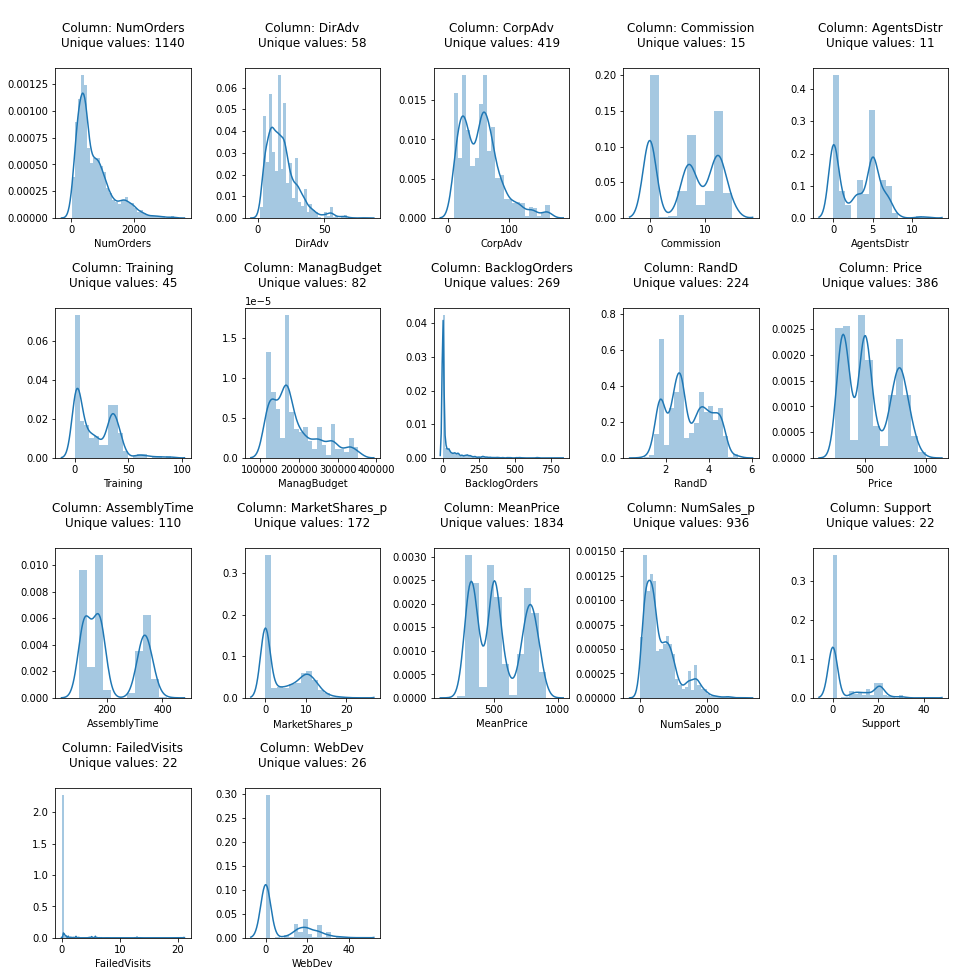

In [22]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(16, 16))
fig.subplots_adjust(hspace=0.6, wspace=0.4)
index = 0
axs = axs.flatten()
for k,v in data.select_dtypes(include=['int64', 'float64']).items():
    sns.distplot(v, ax=axs[index]).set_title(f'\nColumn: {k}\nUnique values: {len(data[k].unique())}\n')
    index = index + 1
for empty in range(17, 20):
    axs[empty].axis('off')

Parallel Coordinates Plot

In [23]:
for product in [1, 2, 3]:
    fig = px.parallel_coordinates(data[data['Product'] == product], 
                                  color="NumOrders", 
                                  color_continuous_scale=px.colors.diverging.Tealrose,
                                  width = 1300,
                                  title = f'Parallel Coorinates Plot for Product {product}')
    fig.show()

scatter plot

NumOrders (DirAdv)


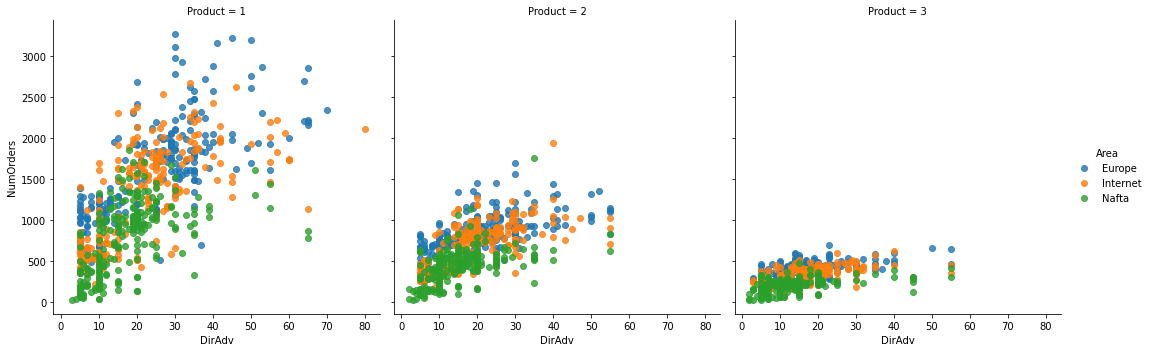

NumOrders (CorpAdv)


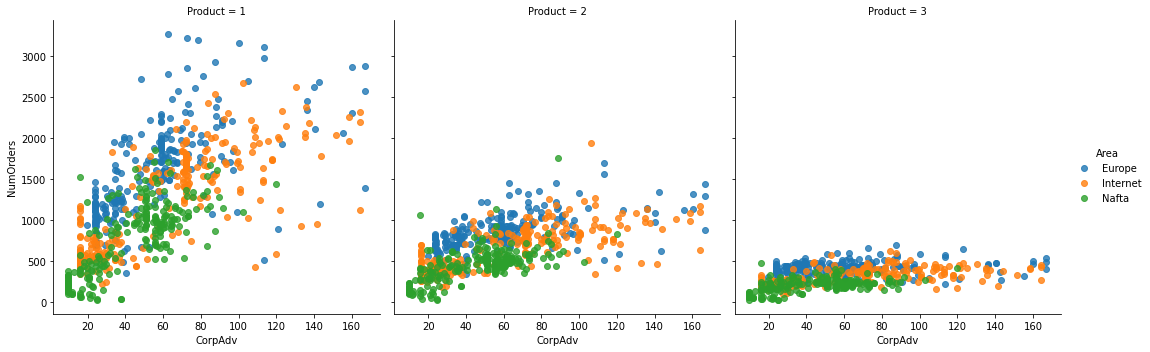

NumOrders (Commission)


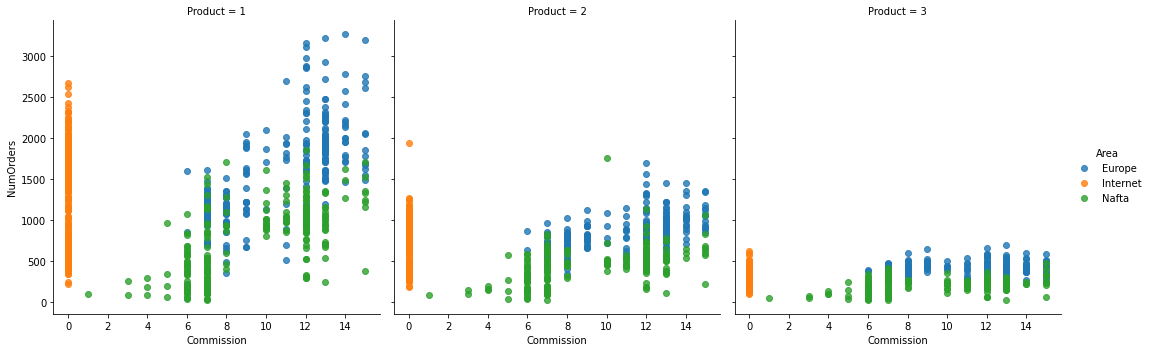

NumOrders (AgentsDistr)


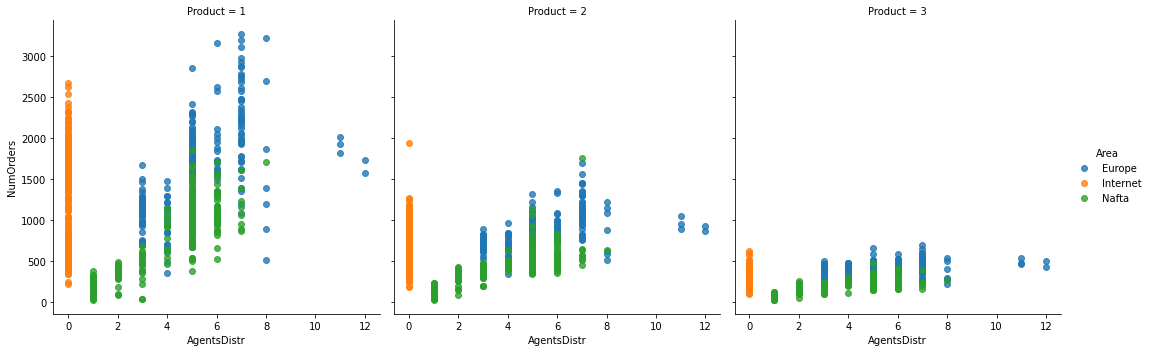

NumOrders (Training)


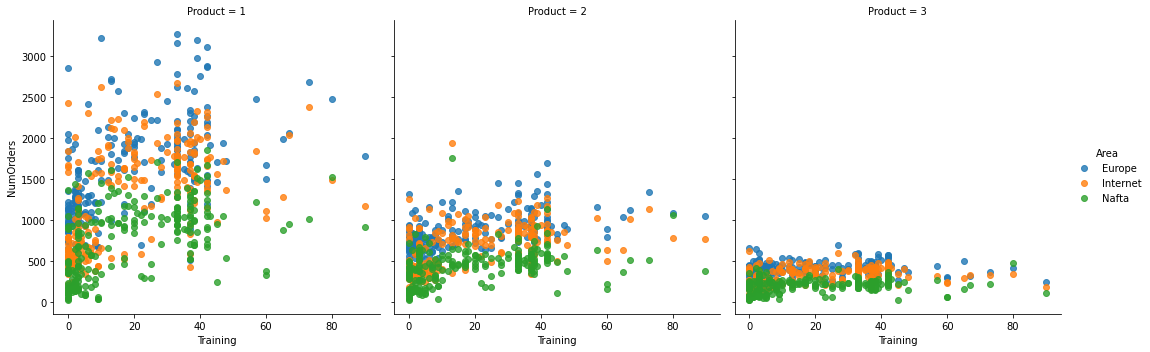

NumOrders (ManagBudget)


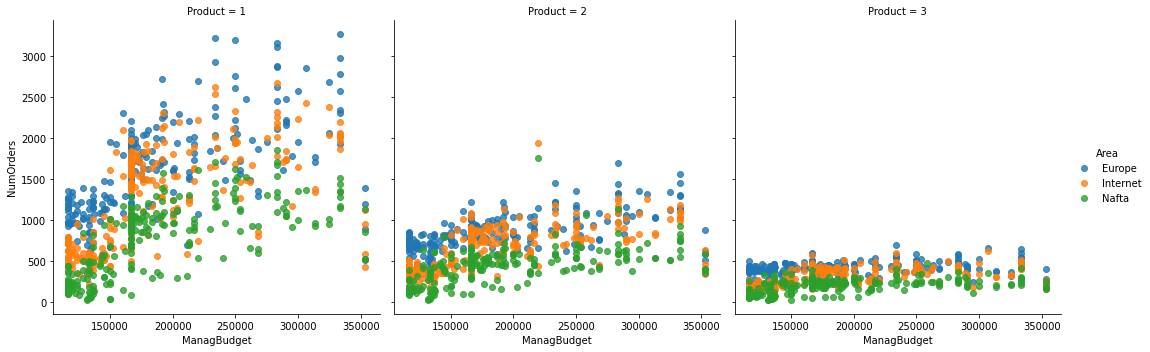

NumOrders (BacklogOrders)


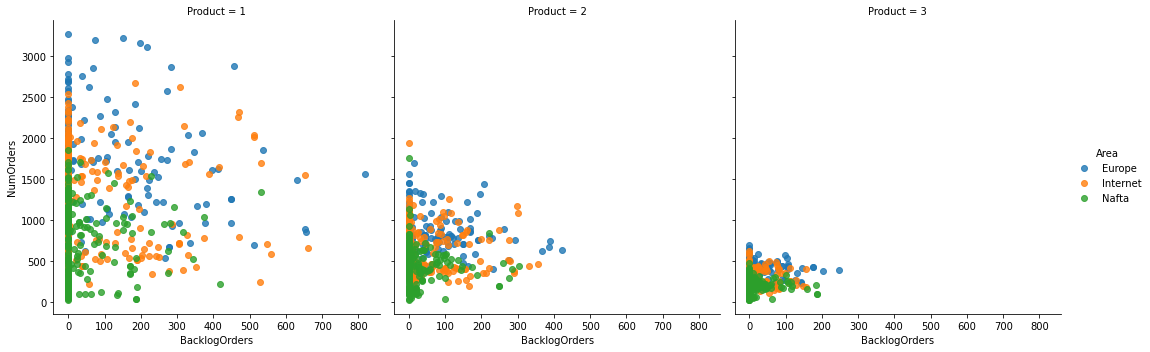

NumOrders (RandD)


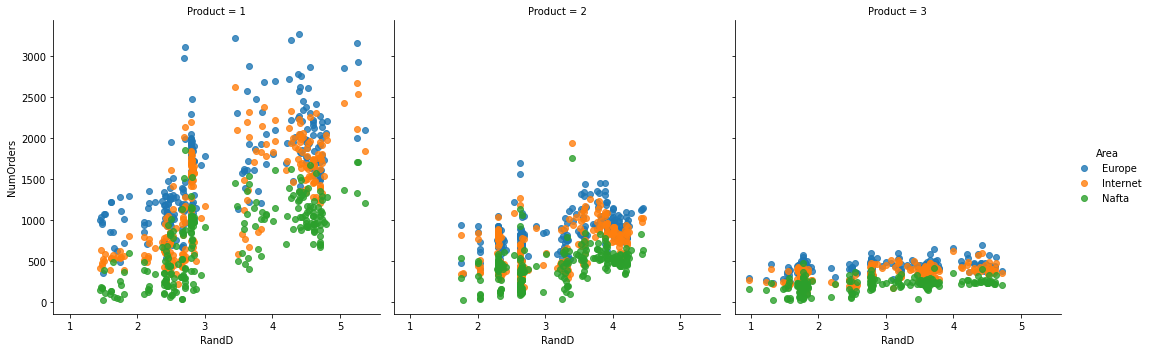

NumOrders (Price)


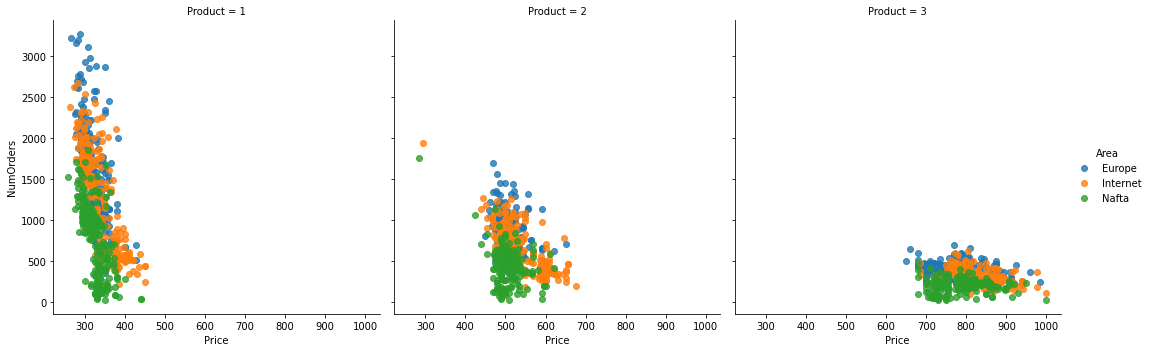

NumOrders (AssemblyTime)


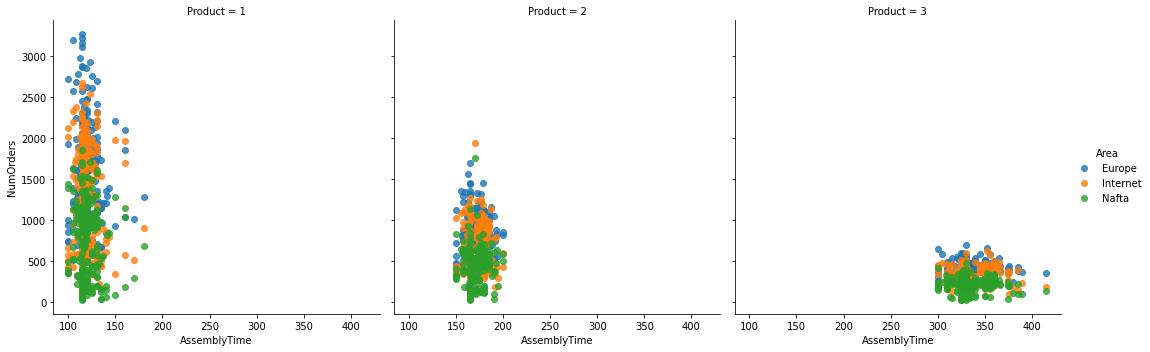

NumOrders (MarketShares_p)


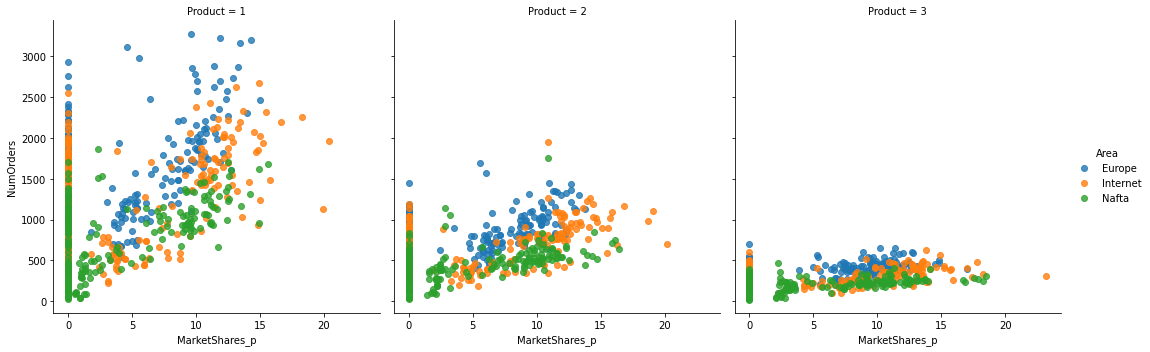

NumOrders (MeanPrice)


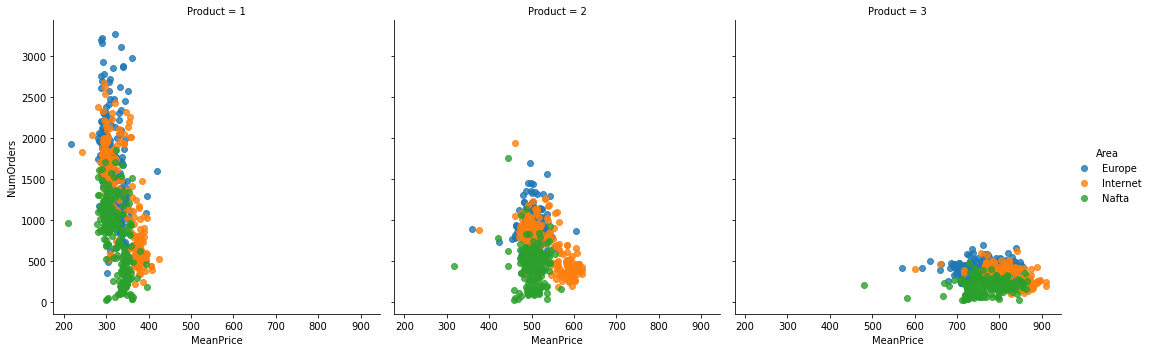

NumOrders (NumSales_p)


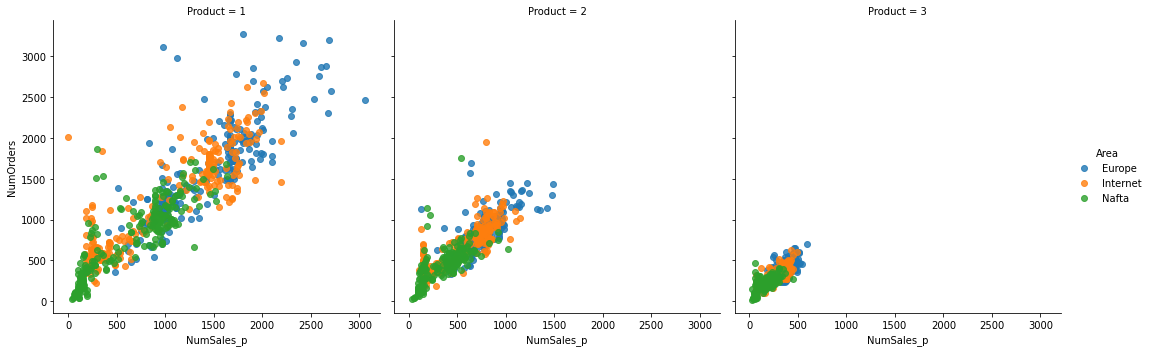

NumOrders (Support)


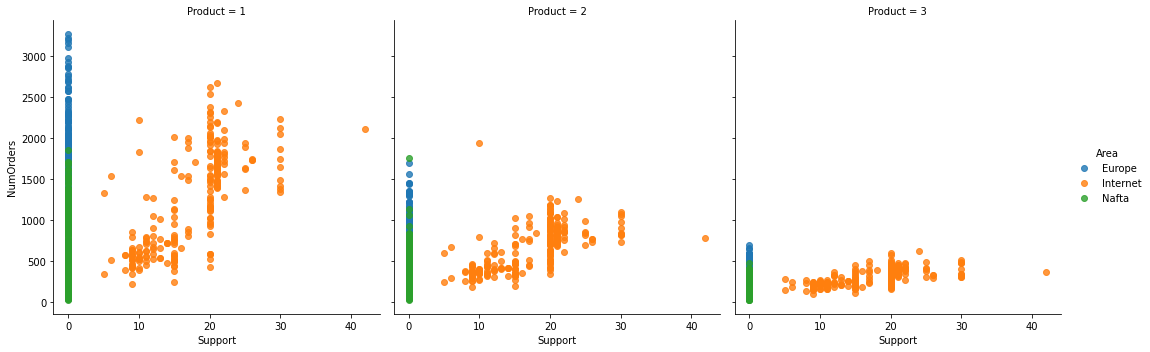

NumOrders (FailedVisits)


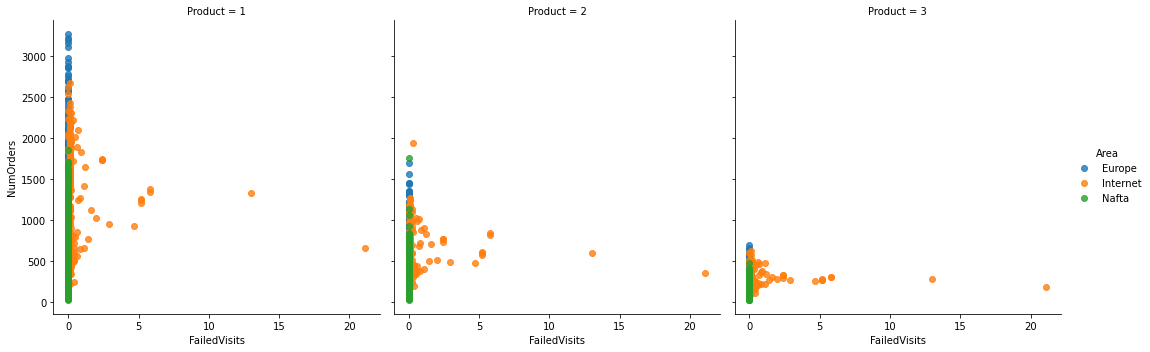

NumOrders (WebDev)


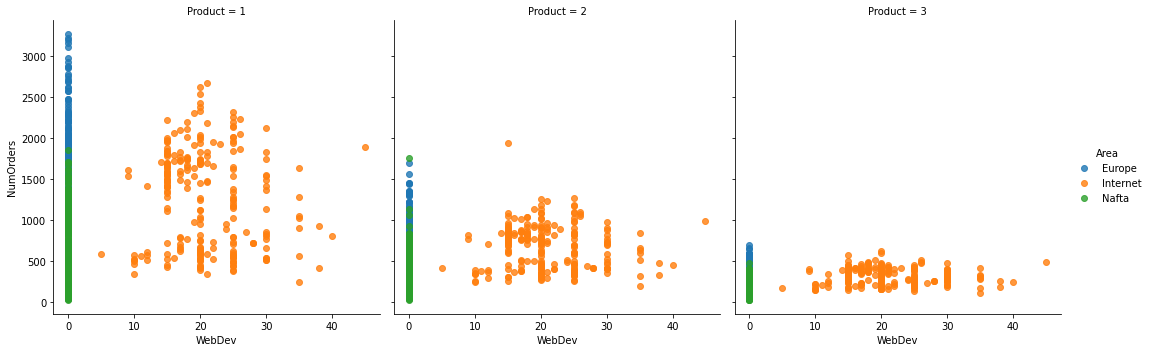

In [24]:
for column in data.select_dtypes(include=['int64', 'float64']).columns[1:]:
    print(f'NumOrders ({column})')
    g = sns.FacetGrid(data, col="Product", hue="Area", height = 5)
    g.map(plt.scatter, column, "NumOrders", alpha=.8)
    g.add_legend()
    plt.show()

heatmap

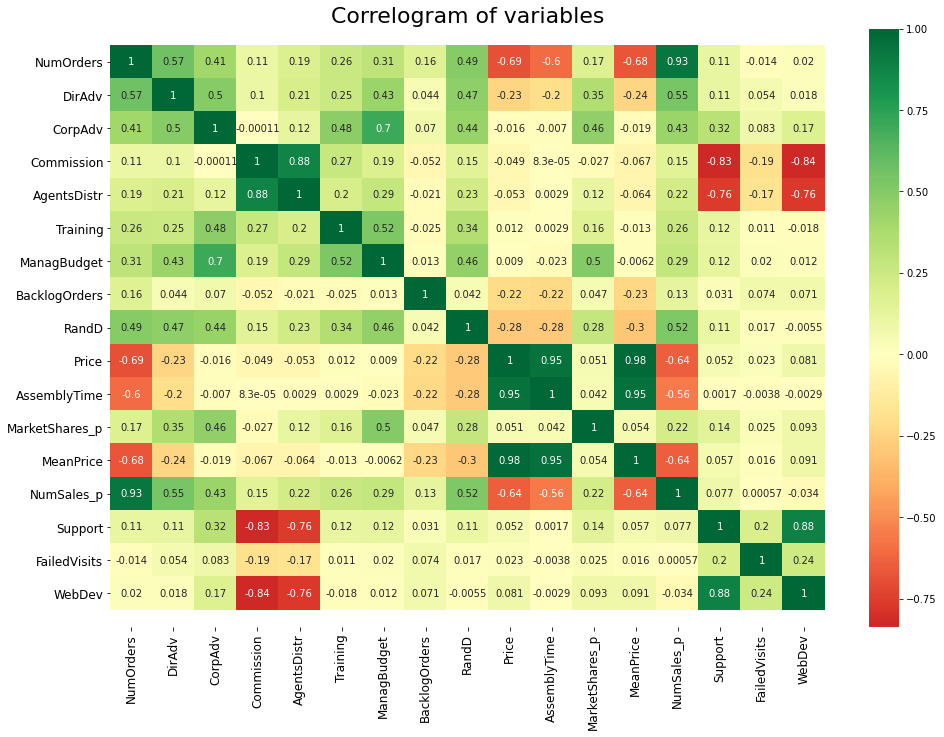

In [25]:
# Plot
plt.figure(figsize=(16, 11))
ax = sns.heatmap(data.corr(), 
                 xticklabels=data.corr().columns, 
                 yticklabels=data.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of variables', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pca cos tam

[0.26716318 0.48700809 0.66872666 0.73135727 0.78857188 0.84203456
 0.88214487 0.91494877 0.94006791 0.96284998 0.97614742 0.98626016
 0.99222754 0.99645447 0.99910821 1.        ]


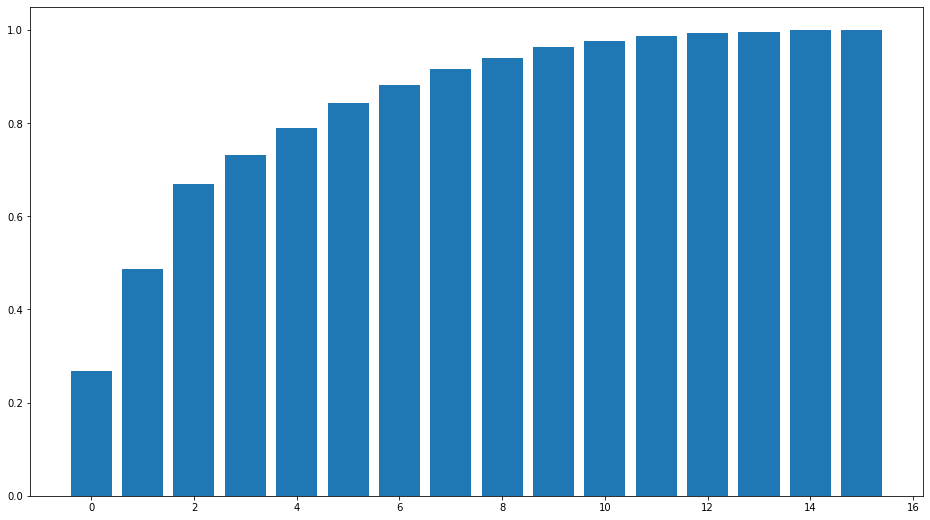

In [26]:
scaled_data = scale(data.select_dtypes(include=['int64', 'float64']).drop(['NumOrders'], axis=1))
pca_explained_data = PCA()
pca_explained_data.fit(scaled_data)
print(np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.figure(figsize=(16, 9))
plt.bar(range(pca_explained_data.n_components_),np.cumsum(pca_explained_data.explained_variance_ratio_))
plt.show()

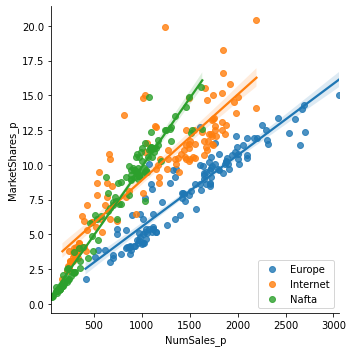

In [27]:
sns.lmplot(x="NumSales_p", y="MarketShares_p", 
           data=data[(data['Product']==1)&(data['MarketShares_p']!=0)], 
           fit_reg=True, hue='Area', legend=False)
plt.legend(loc='lower right')
plt.show()

# 6. Train Test Split

6. Train Test Split
7. Functions
8. Custom Transformers
9. Pipeline

In [28]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('NumOrders', axis = 1),
                                                    data['NumOrders'],
                                                    test_size = 0.2,
                                                    stratify = data['Area'],
                                                    random_state = 123)

# 7. Functions

In [29]:
metrics_data_frame = pd.DataFrame(columns = [
    'RMSE_train', 'Max_error_train', 'MAPE_train', 'RMSE_test', 'Max_error_test', 'MAPE_test'
])

def model_evaluation(model, name,
                     X_test = X_test, X_train = X_train, y_test = y_test, y_train = y_train):
    
    global metrics_data_frame
    
    def hist_of_residuals(X, y, set_name):
        errors = model.predict(X) - y
        plt.hist(errors, bins = 100)
        plt.title(f'Histogram of residuals - {set_name} set')
    
    def plot_of_residuals(X, y, set_name):
        errors = model.predict(X) - y
        plt.scatter(x = y, y = errors)
        plt.axhline(0, color="r", linestyle="--")
        plt.xlabel('True Value')
        plt.ylabel('Residual')
        plt.title(f'Plot of residuals - {set_name} set')
    
    def fit_scatter_plot(X, y, set_name):
        y_fitted_values = model.predict(X)

        xmin = y.min()
        xmax = y.max()
        plt.scatter(x = y_fitted_values, y = y)
        x_line = np.linspace(xmin, xmax, 10)
        y_line = x_line
        plt.plot(x_line, y_line, 'r--')
        plt.xlabel('Prediction')
        plt.ylabel('True Value')
        plt.title(f'Plot of predicted values versus true values - {set_name} set')
        
    def calculate_metrics(model = model, name = name,
                          X_test = X_test, X_train = X_train, y_test = y_test, y_train = y_train):
        
        def mean_absolute_percentage_error(y_true, y_pred): 
            y_true, y_pred = y_true.ravel(), y_pred.ravel()
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
        # quality of fit
        fitted_values = model.predict(X_train)
        rmse_train = np.sqrt(metrics.mean_squared_error(y_train, fitted_values))
        max_error_train = np.max(np.abs(fitted_values - y_train))
        mape_train = mean_absolute_percentage_error(y_true = y_train,
                                                    y_pred = fitted_values)

        # quality of prediction
        y_pred = model.predict(X_test)
        rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        max_error_test = np.max(np.abs(y_pred - y_test))
        mape_test = mean_absolute_percentage_error(y_true = y_test,
                                                   y_pred = y_pred)
        
        calculated_metrics = pd.DataFrame({
            'RMSE_train': rmse_train, 'Max_error_train':max_error_train,'MAPE_train': mape_train,
            'RMSE_test': rmse_test, 'Max_error_test':max_error_test, 'MAPE_test': mape_test
        }, index = [name])
                
        return calculated_metrics
    
    fig = plt.figure(figsize = (16, 12))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    ax = fig.add_subplot(3, 2, 1)
    fit_scatter_plot(X = X_train, y = y_train, set_name = 'train')
    
    ax = fig.add_subplot(3, 2, 2)
    fit_scatter_plot(X = X_test, y = y_test, set_name = 'test')
    
    ax = fig.add_subplot(3, 2, 3)
    plot_of_residuals(X = X_train, y = y_train, set_name = 'train')
    
    ax = fig.add_subplot(3, 2, 4)
    plot_of_residuals(X = X_test, y = y_test, set_name = 'test')    

    ax = fig.add_subplot(3, 2, 5)
    hist_of_residuals(X = X_train, y = y_train, set_name = 'train')   

    ax = fig.add_subplot(3, 2, 6)
    hist_of_residuals(X = X_test, y = y_test, set_name = 'test')
    
    metrics_data_frame = metrics_data_frame.append(calculate_metrics())
    return metrics_data_frame

def save_model(model, name):
    filename = f'models/{name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'The model {name} has been saved')

# 8. Custom Transformers

In [30]:
class CreateDummies(BaseEstimator, TransformerMixin):
    def __init__(self, drop_first = True, columns_to_left = None):
        self.drop_first = drop_first
        self.columns_to_left = columns_to_left
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X = pd.DataFrame(X)
        if self.columns_to_left != None:
            X_left = X[self.columns_to_left].astype(int).copy()
        X = pd.get_dummies(X, drop_first = self.drop_first).copy()
        if self.columns_to_left != None: 
            X = pd.concat([X, X_left], axis = 1)
        return X

# pokazac na wykresie wyzej zaleznosci dla Missing data
class ImputeMissingMarketShares_p(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = [
            'MarketShares_p', 'NumSales_p', 
            'History_1', 'History_2', 'History_3',
            'Cycle_6', 'Cycle_7', 'Cycle_8', 'Cycle_9',
            'Area_Internet', 'Area_Nafta',
            'Product_2', 'Product_3'
        ]
        self.model = None
    
    def fit(self, X, y = None):
        X_fit = X.copy()
        filer_5_cycle = (X_fit['Cycle_6']==0)&(X_fit['Cycle_7']==0)&(X_fit['Cycle_8']==0)&(X_fit['Cycle_9']==0)
        X_fit[filer_5_cycle]['Cycle_6'] = 1
        X_fit = X_fit[X_fit['MarketShares_p'] != 0][self.columns]
        reg_model = LinearRegression()
        reg_model.fit(X_fit.drop(['MarketShares_p'], axis=1),
                      X_fit['MarketShares_p'])
        self.model = reg_model
        return self
    
    def transform(self, X, y = None):
        reg_model = self.model
        filer_5_cycle = (X['Cycle_6']==0)&(X['Cycle_7']==0)&(X['Cycle_8']==0)&(X['Cycle_9']==0)
        X[filer_5_cycle]['Cycle_6'] = 1
        preds = reg_model.predict(X[X['MarketShares_p'] == 0][self.columns].drop(['MarketShares_p'], axis=1))
        X['MarketShares_p'][X['MarketShares_p'] == 0] = preds
        return X

class RemoveColumnsUintTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X.drop(list(X.select_dtypes(include=['uint8']).columns), axis=1)

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        def log_transform(x):
            return 0 if x <= 0 else np.log(x)
        
        X = pd.DataFrame(X)
        for col in X:
            X[col] = X[col].apply(log_transform)
        return X

# 9. Pipeline

In [31]:
# sub pipeline categorical
cols_categorical = ['History', 'Cycle', 'Area', 'Product']
transformer_categorical = Pipeline(steps=[
    ('dummies', CreateDummies(drop_first = True, columns_to_left = None))
])

# sub pipeline numerical
cols_numerical = list(X_train.columns)
transformer_numerical = Pipeline(steps=[
    ('create_dummies', CreateDummies(drop_first = True, columns_to_left = ['Cycle'])),
    ('impute_missing_MarketShares_p', ImputeMissingMarketShares_p()),
    ('remove_columns_uint_transformer', RemoveColumnsUintTransformer()),
    ('log_transform', LogTransformer()),
    ('first_scaler', StandardScaler()), # we have 17 columns after this
    ('dim_red', PCA()),
    ('second_scaler', StandardScaler())
])

# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('categorical', transformer_categorical, cols_categorical),
    ('numerical', transformer_numerical, cols_numerical)
])

In [32]:
list(transformer.get_params().keys())

['n_jobs',
 'remainder',
 'sparse_threshold',
 'transformer_weights',
 'transformers',
 'verbose',
 'categorical',
 'numerical',
 'categorical__memory',
 'categorical__steps',
 'categorical__verbose',
 'categorical__dummies',
 'categorical__dummies__columns_to_left',
 'categorical__dummies__drop_first',
 'numerical__memory',
 'numerical__steps',
 'numerical__verbose',
 'numerical__create_dummies',
 'numerical__impute_missing_MarketShares_p',
 'numerical__remove_columns_uint_transformer',
 'numerical__log_transform',
 'numerical__first_scaler',
 'numerical__dim_red',
 'numerical__second_scaler',
 'numerical__create_dummies__columns_to_left',
 'numerical__create_dummies__drop_first',
 'numerical__first_scaler__copy',
 'numerical__first_scaler__with_mean',
 'numerical__first_scaler__with_std',
 'numerical__dim_red__copy',
 'numerical__dim_red__iterated_power',
 'numerical__dim_red__n_components',
 'numerical__dim_red__random_state',
 'numerical__dim_red__svd_solver',
 'numerical__dim_red_

# 10. Models

## 10.1 Baseline Model

In [33]:
baseline_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                    ('regression', LinearRegression())])

In [34]:
baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model baseline_pipeline has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model  199.585761           1395.0   36.847904  194.351794   

                Max_error_test  MAPE_test  
baseline_model          1254.0  41.777356

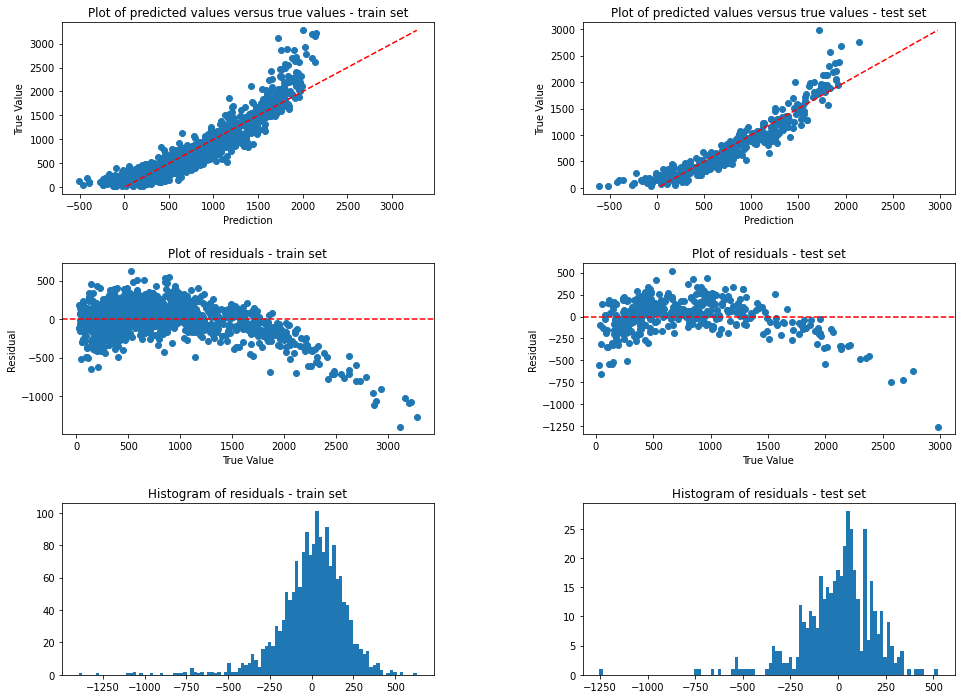

In [35]:
save_model(model = baseline_pipeline, name = 'baseline_pipeline')
model_evaluation(model = baseline_pipeline, name = 'baseline_model')

## 10.2 Polynomial Regression

In [36]:
polynomial_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                                 ('polynomial_features',PolynomialFeatures(degree=3)),
                                                 ('regression_model', ElasticNet(alpha = 0.1, l1_ratio = 0.5))])

In [37]:
n_startup_jobs = 64
 

max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'polynomial_features__degree': hp.choice('polynomial_features__degree', np.arange(1, 4).tolist()),
    'regression_model__alpha': hp.loguniform ('regression_model__alpha', 0.0001, 10.0),
    'regression_model__l1_ratio': hp.uniform ('regression_model__l1_ratio', 0.0, 1.0),
}

def objective(space):
    polynomial_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'polynomial_features__degree': space['polynomial_features__degree'],
        'regression_model__alpha': space['regression_model__alpha'],
        'regression_model__l1_ratio': space['regression_model__l1_ratio'],
    }
    
    polynomial_regression_pipeline.set_params(**polynomial_regression_params) 
    
    score = - cross_val_score(polynomial_regression_pipeline, X_train, y_train, cv=10,
                            scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

polynomial_regression = polynomial_regression_pipeline.set_params(**best_params)
polynomial_regression.fit(X_train, y_train)

100%|██████████| 256/256 [09:29<00:00,  2.22s/trial, best loss: 142.44243446559344] 

The best params:
Parameter                                                    Selected
polynomial_features__degree                                  3
preprocessor__numerical__dim_red__n_components               0.8984914928062001
preprocessor__numerical__first_scaler                        StandardScaler()
preprocessor__numerical__log_transform                       None
preprocessor__numerical__second_scaler                       None
regression_model__alpha                                      1.0178506379201413
regression_model__l1_ratio                                   0.17451966444723016


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model polynomial_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model         199.585761      1395.000000   36.847904  194.351794   
polynomial_regression  121.210436      1145.073785   18.666147  155.233997   

                       Max_error_test  MAPE_test  
baseline_model             1254.00000  41.777356  
polynomial_regression      1129.45731  22.394537

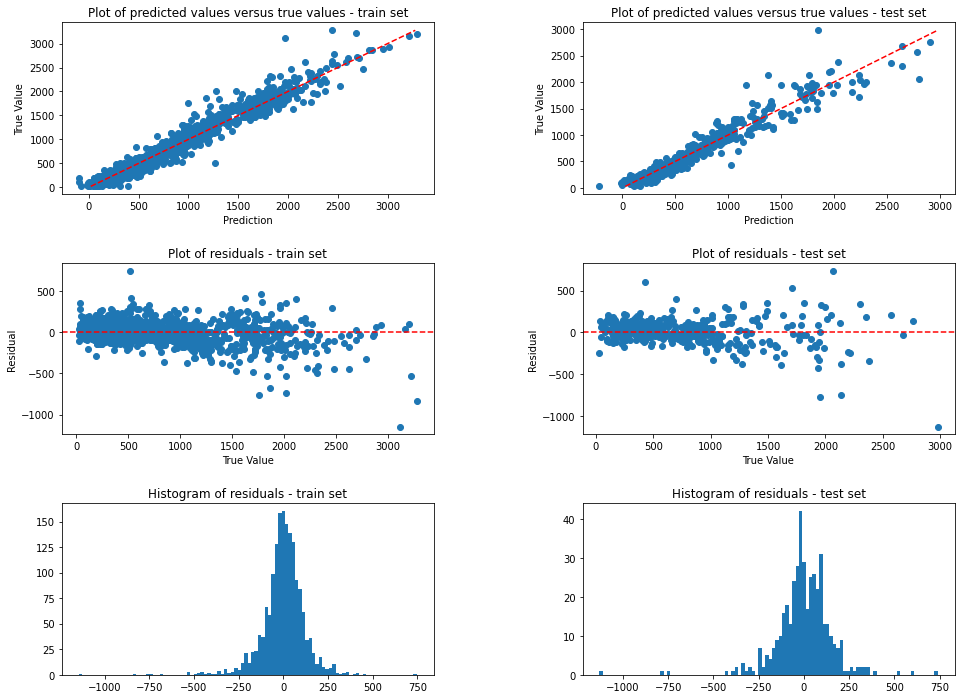

In [38]:
save_model(model = polynomial_regression, name = 'polynomial_regression')
model_evaluation(model = polynomial_regression, name = 'polynomial_regression')

## 10.3 Random Forest Regression

In [39]:
random_forest_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                                    ('regression_model', RandomForestRegressor(n_jobs = -1))])

In [41]:
n_startup_jobs = 128
 

max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 51).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 50).tolist()),
}

def objective(space):
    random_forest_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    random_forest_regression_pipeline.set_params(**random_forest_regression_params) 
    
    score = - cross_val_score(random_forest_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

random_forest_regression = random_forest_regression_pipeline.set_params(**best_params)
random_forest_regression.fit(X_train, y_train)

100%|██████████| 256/256 [1:26:14<00:00, 20.21s/trial, best loss: nan]  

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.7731828169163677
preprocessor__numerical__first_scaler                        StandardScaler()
preprocessor__numerical__log_transform                       None
preprocessor__numerical__second_scaler                       MinMaxScaler()
regression_model__max_depth                                  49
regression_model__max_leaf_nodes                             30
regression_model__min_samples_leaf                           4
regression_model__min_samples_split                          4
regression_model__n_estimators                               100


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model random_forest_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     121.210436      1145.073785   18.666147  155.233997   
random_forest_regression  145.177389      1307.194772   23.502162  199.691418   

                          Max_error_test  MAPE_test  
baseline_model                1254.00000  41.777356  
polynomial_regression         1129.45731  22.394537  
random_forest_regression      1667.04173  24.262611

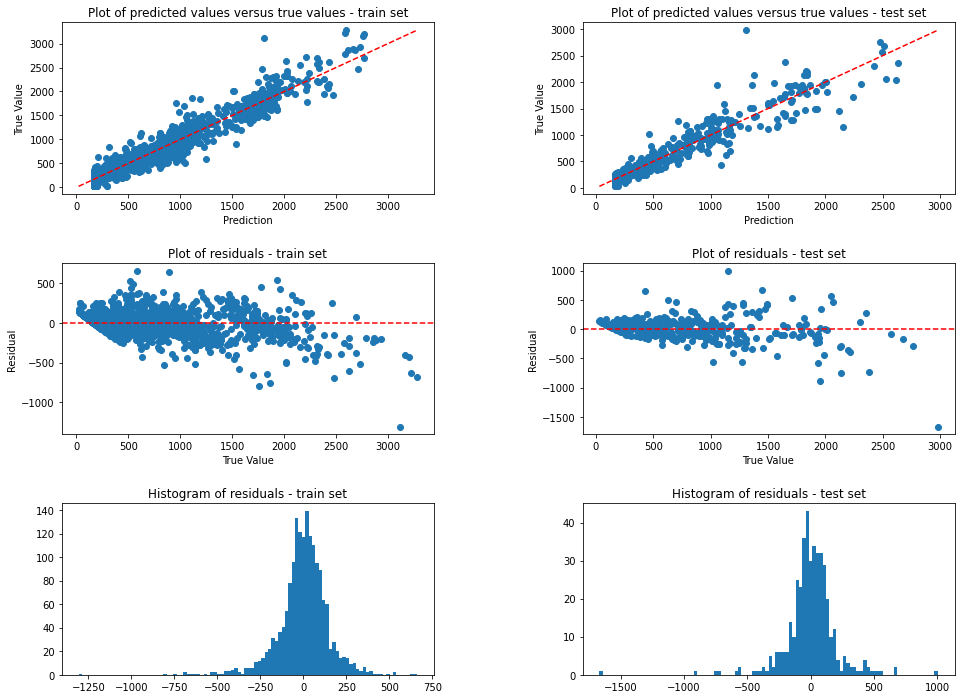

In [42]:
save_model(model = random_forest_regression, name = 'random_forest_regression')
model_evaluation(model = random_forest_regression, name = 'random_forest_regression')

## 10.5 Extra Trees Regression

In [43]:
extra_trees_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                                  ('regression_model', ExtraTreesRegressor(n_jobs = -1))])

In [45]:
n_startup_jobs = 128
 

max_evals = 256 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 51).tolist()),
    'regression_model__min_samples_leaf': hp.choice('regression_model__min_samples_leaf', 
                                                    np.arange(1, 6).tolist()),
    'regression_model__min_samples_split': hp.choice('regression_model__min_samples_split',
                                                     np.arange(2, 11).tolist()),
    'regression_model__max_leaf_nodes': hp.choice('regression_model__max_leaf_nodes', np.arange(5, 31).tolist()),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(50, 1050, 50).tolist()),
}

def objective(space):
    extra_trees_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_samples_leaf': space['regression_model__min_samples_leaf'],
        'regression_model__min_samples_split': space['regression_model__min_samples_split'],
        'regression_model__max_leaf_nodes': space['regression_model__max_leaf_nodes'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
    }
    
    extra_trees_regression_pipeline.set_params(**extra_trees_regression_params) 
    
    score = - cross_val_score(extra_trees_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

extra_trees_regression = extra_trees_regression_pipeline.set_params(**best_params)
extra_trees_regression.fit(X_train, y_train)

100%|██████████| 256/256 [45:27<00:00, 10.65s/trial, best loss: 166.7216099739202]  

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.9450804579272916
preprocessor__numerical__first_scaler                        StandardScaler()
preprocessor__numerical__log_transform                       None
preprocessor__numerical__second_scaler                       None
regression_model__max_depth                                  11
regression_model__max_leaf_nodes                             27
regression_model__min_samples_leaf                           5
regression_model__min_samples_split                          2
regression_model__n_estimators                               750


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model extra_trees_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     121.210436      1145.073785   18.666147  155.233997   
random_forest_regression  145.177389      1307.194772   23.502162  199.691418   
extra_trees_regression    152.988580      1155.014834   25.875145  178.816655   

                          Max_error_test  MAPE_test  
baseline_model               1254.000000  41.777356  
polynomial_regression        1129.457310  22.394537  
random_forest_regression     1667.041730  24.262611  
extra_trees_regression       1093.499827  24.864638

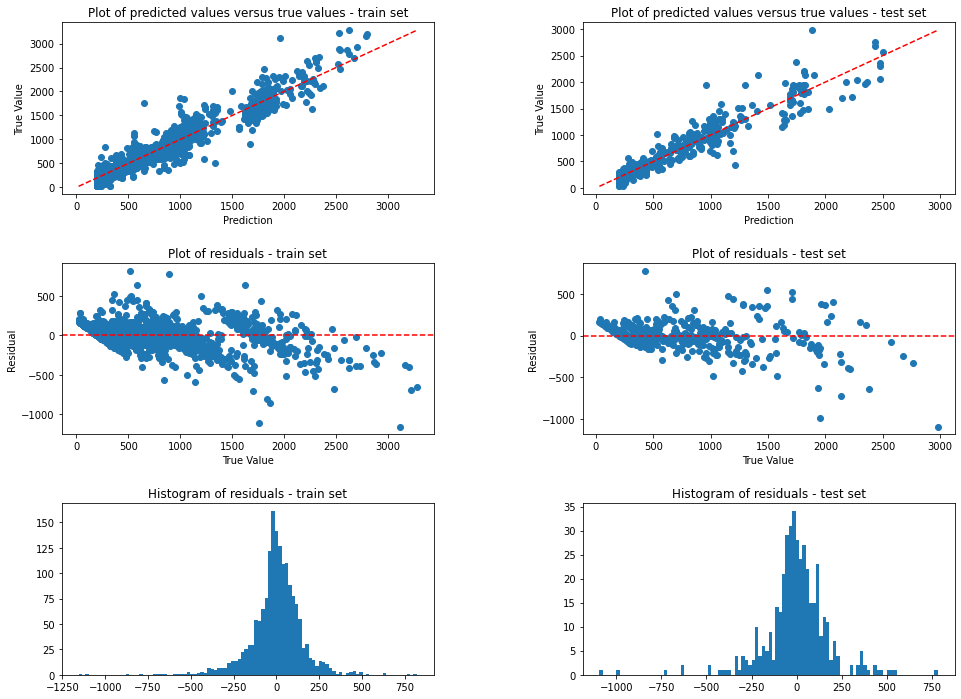

In [46]:
save_model(model = extra_trees_regression, name = 'extra_trees_regression')
model_evaluation(model = extra_trees_regression, name = 'extra_trees_regression')

## 10.6 Support Vector Regression

In [47]:
svr_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                          ('regression_model', SVR(kernel='rbf'))])

In [49]:
n_startup_jobs = 256
 
max_evals = 1024 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__C': hp.uniform ('regression_model__C', 1.0, 50000.0),
    'regression_model__epsilon': hp.uniform ('regression_model__epsilon', 0.0001, 0.5),
    'regression_model__gamma': hp.uniform ('regression_model__gamma', 0.0001, 100.0)
}

def objective(space):
    svr_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__C': space['regression_model__C'],
        'regression_model__epsilon': space['regression_model__epsilon'],
        'regression_model__gamma': space['regression_model__gamma'],

    }
    
    svr_regression_pipeline.set_params(**svr_regression_params) 
    
    score = - cross_val_score(svr_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

svr_regression = svr_regression_pipeline.set_params(**best_params)
svr_regression.fit(X_train, y_train)

100%|██████████| 1024/1024 [2:15:22<00:00,  7.93s/trial, best loss: 138.32296861188652] 

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.6940713474498084
preprocessor__numerical__first_scaler                        MinMaxScaler()
preprocessor__numerical__log_transform                       None
preprocessor__numerical__second_scaler                       MinMaxScaler()
regression_model__C                                          43046.744057638614
regression_model__epsilon                                    0.33342190499842844
regression_model__gamma                                      0.18889435891218903


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model svr_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     121.210436      1145.073785   18.666147  155.233997   
random_forest_regression  145.177389      1307.194772   23.502162  199.691418   
extra_trees_regression    152.988580      1155.014834   25.875145  178.816655   
svr_regression            118.423065      1063.647597   12.794843  144.665241   

                          Max_error_test  MAPE_test  
baseline_model               1254.000000  41.777356  
polynomial_regression        1129.457310  22.394537  
random_forest_regression     1667.041730  24.262611  
extra_trees_regression       1093.499827  24.864638  
svr_regression                829.730447  16.747763

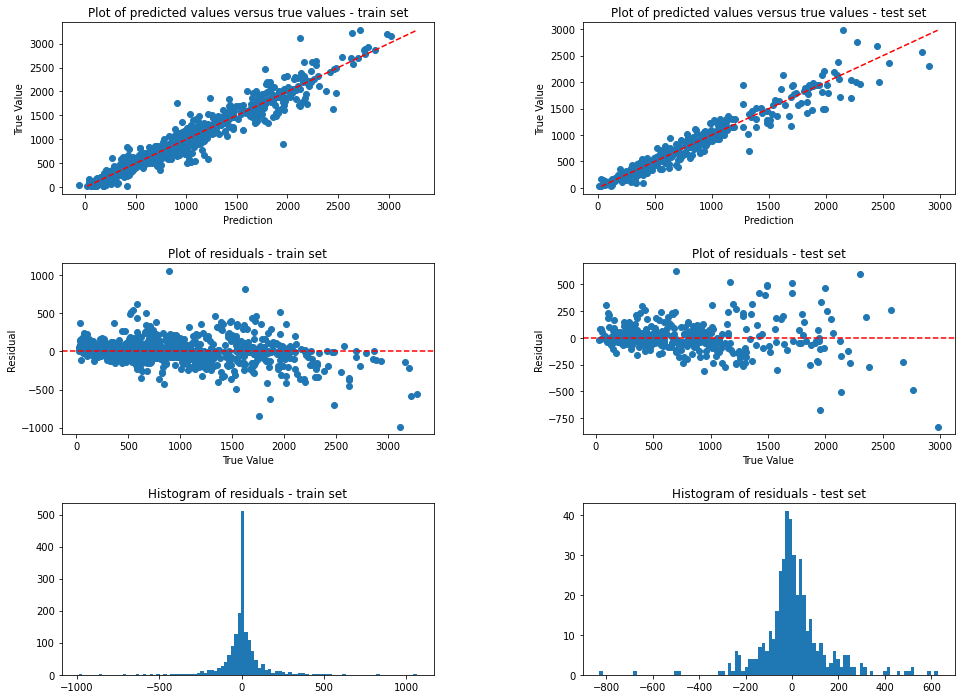

In [50]:
save_model(model = svr_regression, name = 'svr_regression')
model_evaluation(model = svr_regression, name = 'svr_regression')

## 10.7 AdaBoost Regression

In [51]:
adaboost_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                          ('regression_model',
                                           AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                                                             n_estimators=500, learning_rate=0.5,
                                                             random_state = 123))])

In [53]:
n_startup_jobs = 256
 

max_evals = 1024 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(100, 1100, 100).tolist()),
    'regression_model__learning_rate': hp.loguniform ('regression_model__learning_rate', 0.01, 0.9),
    'regression_model__base_estimator__max_depth': hp.choice('regression_model__base_estimator__max_depth',
                                                             np.arange(2, 21).tolist()),
    'regression_model__base_estimator__max_leaf_nodes': hp.choice(
                                                        'regression_model__base_estimator__max_leaf_nodes',
                                                        np.arange(5, 31).tolist()),
}

def objective(space):
    adaboost_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
        'regression_model__learning_rate': space['regression_model__learning_rate'],
        'regression_model__base_estimator__max_depth': space['regression_model__base_estimator__max_depth'],
        'regression_model__base_estimator__max_leaf_nodes': space[
                                                            'regression_model__base_estimator__max_leaf_nodes'],
    }
    
    adaboost_regression_pipeline.set_params(**adaboost_regression_params) 
    
    score = - cross_val_score(adaboost_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

adaboost_regression = adaboost_regression_pipeline.set_params(**best_params)
adaboost_regression.fit(X_train, y_train)

100%|██████████| 1024/1024 [3:16:19<00:00, 11.50s/trial, best loss: 165.77517250096005] 

The best params:
Parameter                                                    Selected
preprocessor__numerical__dim_red__n_components               0.8215892142472081
preprocessor__numerical__first_scaler                        StandardScaler()
preprocessor__numerical__log_transform                       None
preprocessor__numerical__second_scaler                       StandardScaler()
regression_model__base_estimator__max_depth                  18
regression_model__base_estimator__max_leaf_nodes             28
regression_model__learning_rate                              2.324208739535098
regression_model__n_estimators                               900


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummies',
                                                                   CreateDummies())]),
                                                  ['History', 'Cycle', 'Area',
                                                   'Product']),
                                                 ('numerical',
                                                  Pipeline(steps=[('create_dummies',
                                                                   CreateDummies(columns_to_left=['Cycle'])),
                                                                  ('impute_missing_MarketShares_p',
                                                                   ImputeMissingMarketShares_p()),
                                                                  ('remove_columns_uint_transformer'...
                                 

The model adaboost_regression has been saved


RMSE_train  Max_error_train  MAPE_train   RMSE_test  \
baseline_model            199.585761      1395.000000   36.847904  194.351794   
polynomial_regression     121.210436      1145.073785   18.666147  155.233997   
random_forest_regression  145.177389      1307.194772   23.502162  199.691418   
extra_trees_regression    152.988580      1155.014834   25.875145  178.816655   
svr_regression            118.423065      1063.647597   12.794843  144.665241   
adaboost_regression       125.527265       289.296875   35.825974  197.748318   

                          Max_error_test  MAPE_test  
baseline_model               1254.000000  41.777356  
polynomial_regression        1129.457310  22.394537  
random_forest_regression     1667.041730  24.262611  
extra_trees_regression       1093.499827  24.864638  
svr_regression                829.730447  16.747763  
adaboost_regression          1259.712644  36.170800

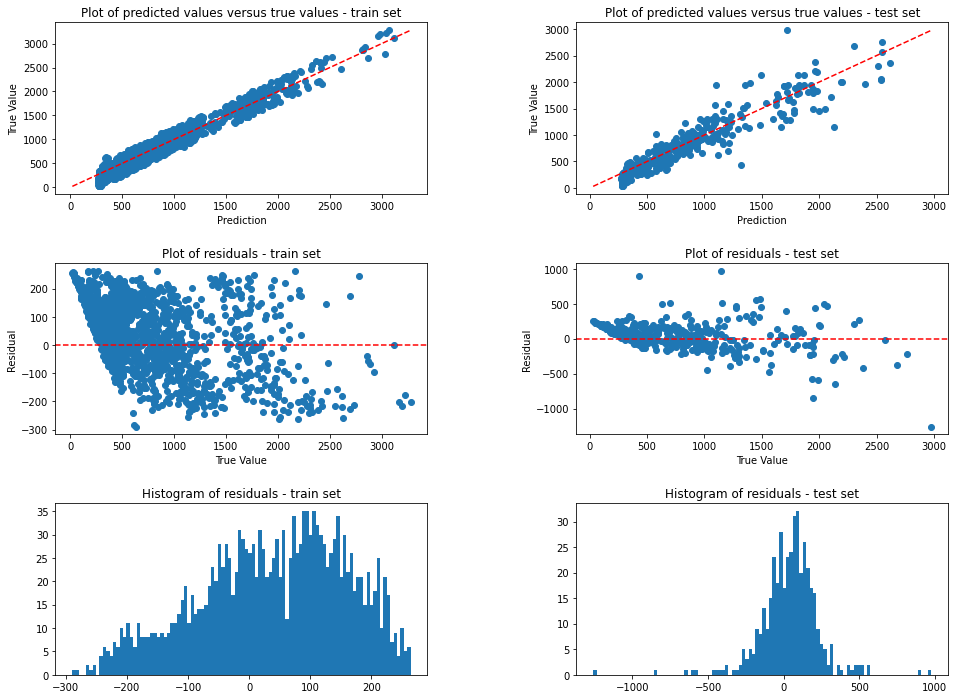

In [54]:
save_model(model = adaboost_regression, name = 'adaboost_regression')
model_evaluation(model = adaboost_regression, name = 'adaboost_regression')

## 10.8 XGBoost Regression

In [64]:
xgboost_regression_pipeline = Pipeline(steps=[('preprocessor', transformer),
                                          ('regression_model', xgb.XGBRegressor(n_estimators=3, learning_rate=0.5,
                                                                                random_state=123))])

In [66]:
n_startup_jobs = 512
 

max_evals = 1024 

space ={
    'preprocessor__numerical__log_transform': hp.choice('preprocessor__numerical__log_transform',
                                                        [LogTransformer(),
                                                         PowerTransformer(method='box-cox')]),
    'preprocessor__numerical__first_scaler': hp.choice('preprocessor__numerical__first_scaler',
                                                       [StandardScaler(), MinMaxScaler()]),
    'preprocessor__numerical__dim_red__n_components': hp.uniform('preprocessor__numerical__dim_red__n_components',
                                                                0.8, 1.0),
    'preprocessor__numerical__second_scaler': hp.choice('preprocessor__numerical__second_scaler',
                                                       [None, StandardScaler(), MinMaxScaler()]),
    'regression_model__n_estimators': hp.choice('regression_model__n_estimators',
                                                np.arange(100, 1100, 100).tolist()),
    'regression_model__learning_rate': hp.loguniform ('regression_model__learning_rate', 0.01, 0.5),
    'regression_model__max_depth': hp.choice('regression_model__max_depth', np.arange(2, 11).tolist()),
    'regression_model__min_child_weight': hp.choice('regression_model__min_child_weight',
                                                    np.arange(0, 101).tolist()),
    'regression_model__gamma': hp.loguniform('regression_model__gamma', 0.0, 2.0),
    'regression_model__subsample': hp.uniform('regression_model__subsample', 0.5, 1.0),
    'regression_model__colsample_bytree': hp.uniform('regression_model__colsample_bytree', 0.5, 1.0),
    'regression_model__colsample_bylevel': hp.uniform('regression_model__colsample_bylevel', 0.5, 1.0),
    'regression_model__reg_alpha': hp.loguniform('regression_model__reg_alpha', 0.0, 2.0),
    'regression_model__reg_lambda': hp.loguniform('regression_model__reg_lambda', 0.0, 2.0),
}

def objective(space):
    xgboost_regression_params = {
        'preprocessor__numerical__log_transform': space['preprocessor__numerical__log_transform'],
        'preprocessor__numerical__first_scaler': space['preprocessor__numerical__first_scaler'],
        'preprocessor__numerical__dim_red__n_components': space['preprocessor__numerical__dim_red__n_components'],
        'preprocessor__numerical__second_scaler': space['preprocessor__numerical__second_scaler'],
        'regression_model__n_estimators': space['regression_model__n_estimators'],
        'regression_model__learning_rate': space['regression_model__learning_rate'],
        'regression_model__max_depth': space['regression_model__max_depth'],
        'regression_model__min_child_weight': space['regression_model__min_child_weight'],
        'regression_model__gamma': space['regression_model__gamma'],
        'regression_model__subsample': space['regression_model__subsample'],
        'regression_model__colsample_bytree': space['regression_model__colsample_bytree'],
        'regression_model__colsample_bylevel': space['regression_model__colsample_bylevel'],
        'regression_model__reg_alpha': space['regression_model__reg_alpha'],
        'regression_model__reg_lambda': space['regression_model__reg_lambda'],
    }
    
    xgboost_regression_pipeline.set_params(**xgboost_regression_params) 
    
    score = - cross_val_score(xgboost_regression_pipeline, X_train, y_train, cv=10,
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1).mean()
    
    return{'loss':score, 'status': STATUS_OK }

trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)
 
best_params = space_eval(space, best_params)
print('\nThe best params:')
print ("{:<60} {}".format('Parameter','Selected'))
for k, v in best_params.items():
    print ("{:<60} {}".format(k, v))

xgboost_regression = xgboost_regression_pipeline.set_params(**best_params)
xgboost_regression.fit(X_train, y_train)

  6%|▌         | 58/1024 [09:43<2:42:00, 10.06s/trial, best loss: 142.33879197892682]


KeyboardInterrupt: 

The model xgboost_regression has been saved


ValueError: autodetected range of [nan, nan] is not finite

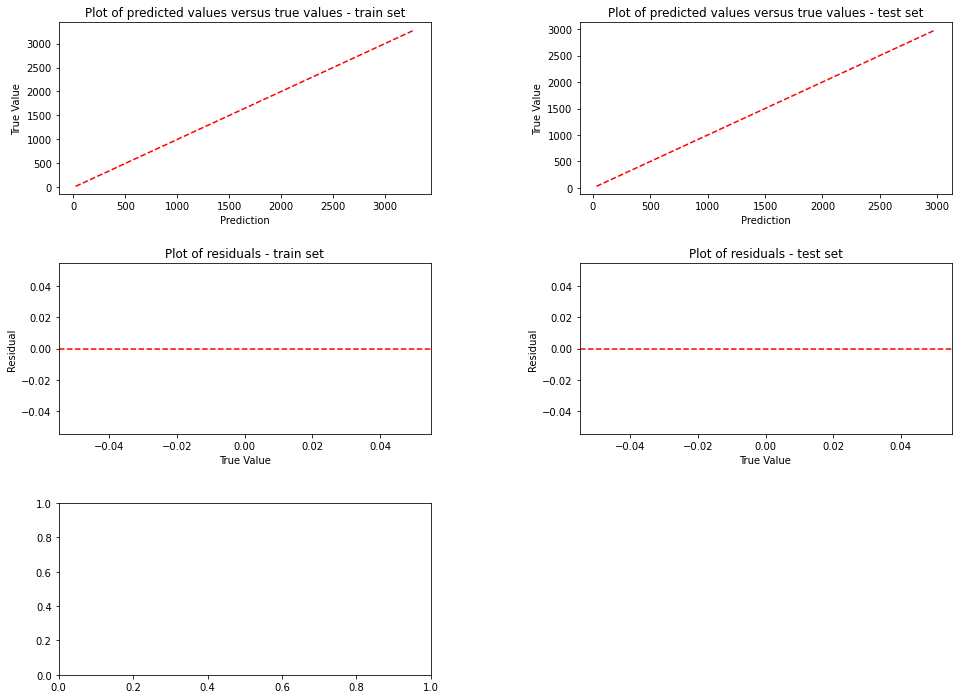

In [69]:
save_model(model = xgboost_regression, name = 'xgboost_regression')
model_evaluation(model = xgboost_regression, name = 'xgboost_regression')